In [1]:
import pandas as pd
import nltk
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import networkx as nx
warnings.filterwarnings("ignore")
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Task A

In [2]:
sent_scores = pd.read_csv('assignment 3 sentiment scores.csv')
sent_scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [11]:
maska=sent_scores['XJ'].notnull()
maskb=sent_scores['A6'].notnull()
masked=sent_scores[maska&maskb]

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
464,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-2.0,NaN


In [17]:
modelset=set(sent_scores.columns)

In [71]:
def compare(a,b):
    '''compare a and b to get the direction and weight
    if tie, then return noting'''
    maska=sent_scores[a].notnull()
    maskb=sent_scores[b].notnull()
    masked=sent_scores[maska&maskb]
    dif=round(sum(masked[a]-masked[b])/len(masked),2)
    
    if dif>0:
        return(b, a, dif)
    elif dif<0:
        return(a, b, -dif)

    else:
        return

In [72]:
from itertools import combinations
compare_result=[]
model_combine=list(combinations(modelset,2))
for i in model_combine:
    compare_result.append(compare(i[0],i[1]))
compare_result=[str for str in compare_result if str not in [None]]

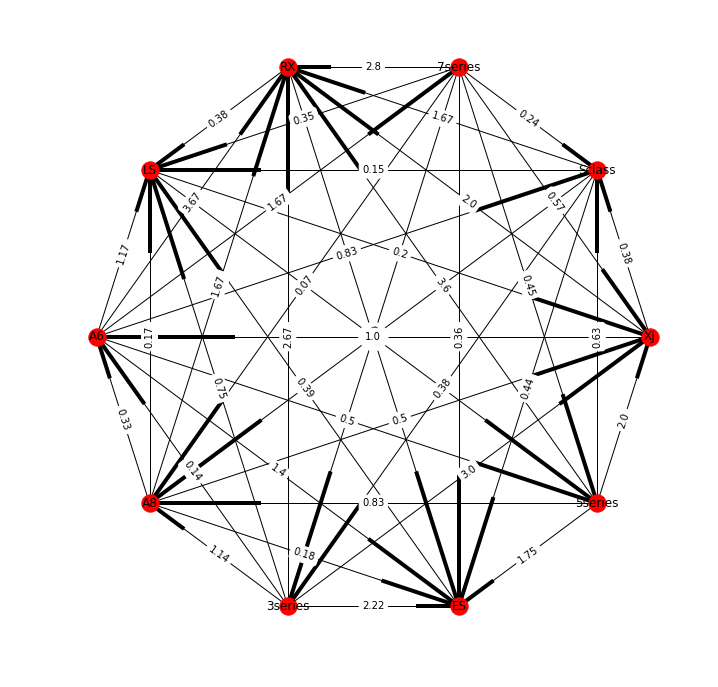

In [90]:
fig = plt.figure(figsize=(12, 12))
G = nx.DiGraph()
for i in compare_result:
    G.add_edge(i[0], i[1], weight=i[2])
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)    
nx.draw(G, pos=pos, arrows=True, with_labels=True)

plt.show()